In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Dataset .csv")

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Task 1 - Cuisine Combination**

# **Most Common Cuisine Combinations**

In [ ]:
# Drop missing cuisines
cuisine_combo = df.dropna(subset=['Cuisines'])

# Count cuisine combinations
top_combinations = cuisine_combo['Cuisines'].value_counts().head(10)

top_combinations


,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


# **Average Rating by Cuisine Combination**

In [ ]:
# Remove missing ratings
combo_rating = cuisine_combo.dropna(subset=['Aggregate rating'])

# Average rating per cuisine combination
avg_rating_combo = combo_rating.groupby('Cuisines')['Aggregate rating'].mean()

# Top 10 combinations with highest average rating
avg_rating_combo.sort_values(ascending=False).head(10)


,Aggregate rating
Cuisines,
"Burger, Bar Food, Steak",4.9
"American, Burger, Grill",4.9
"American, Caribbean, Seafood",4.9
"American, Coffee and Tea",4.9
"Mexican, American, Healthy Food",4.9
"Italian, Bakery, Continental",4.9
"BBQ, Breakfast, Southern",4.9
"European, German",4.9
"Hawaiian, Seafood",4.9


# **Visualization**

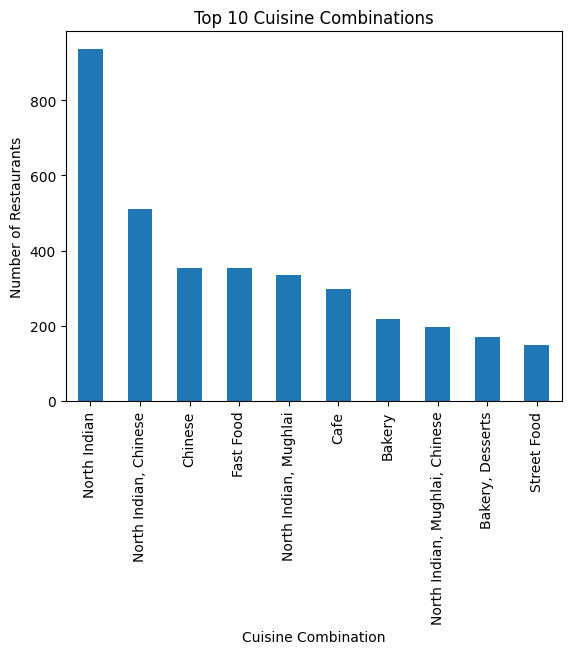

In [ ]:
top_combinations.plot(kind='bar')
plt.title('Top 10 Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Number of Restaurants')
plt.show()


Cuisine combinations were analyzed without splitting to preserve the original combinations offered by restaurants. The most common combinations were identified using frequency counts. Average ratings were calculated for each combination to evaluate whether certain cuisine pairings tend to receive higher customer ratings.

# **Task 2 - Geographic Analysis**

# **Check Location Columns**

In [ ]:
df[['Latitude', 'Longitude']].head()


,Latitude,Longitude
0,14.565443,121.027535
1,14.553708,121.014101
2,14.581404,121.056831
3,14.585318,121.056475
4,14.584450,121.057508


# **Clean Location Data**

In [ ]:
geo_df = df.dropna(subset=['Latitude', 'Longitude'])
geo_df.shape


(9551, 21)

# **Visualization**

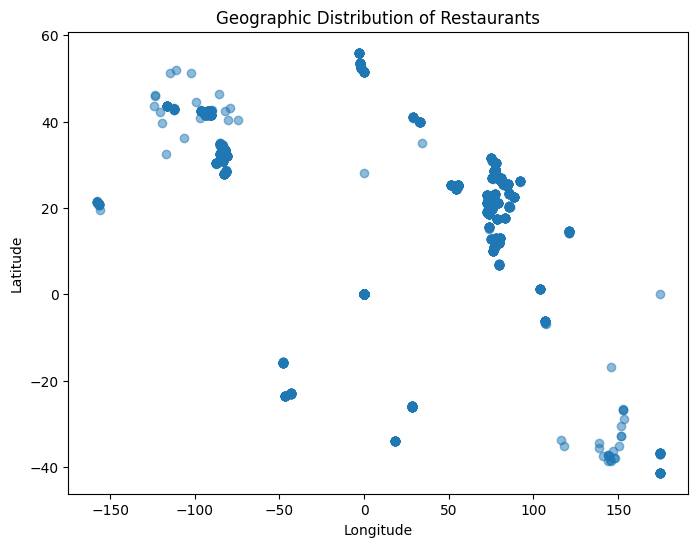

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    geo_df['Longitude'],
    geo_df['Latitude'],
    alpha=0.5
)

plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


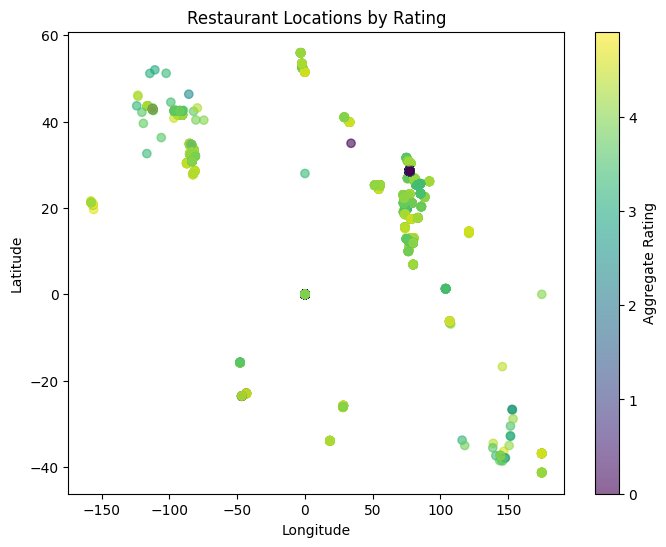

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    geo_df['Longitude'],
    geo_df['Latitude'],
    c=geo_df['Aggregate rating'],
    alpha=0.6
)

plt.colorbar(label='Aggregate Rating')
plt.title('Restaurant Locations by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The geographic visualization shows that restaurants are not evenly distributed and tend to cluster in specific urban areas. These clusters indicate regions with higher restaurant density, likely corresponding to city centers or commercial zones.

Geographic analysis was performed using latitude and longitude values. A scatter plot was created to visualize the spatial distribution of restaurants. Clusters observed in the plot suggest higher restaurant density in certain regions, indicating popular dining areas.

# **Task 3 - Restaurant Chains**

# **Identify Restaurant Chains**

In [ ]:
# Count restaurant name occurrences
restaurant_counts = df['Restaurant Name'].value_counts()

# Identify chains (restaurants with more than 1 outlet)
chains = restaurant_counts[restaurant_counts > 1]

chains.head(10)


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
Keventers,34
Pizza Hut,30
Giani,29
Baskin Robbins,28


# **Create Chain DataFrame**

In [ ]:
# Filter only chain restaurants
chain_df = df[df['Restaurant Name'].isin(chains.index)]

chain_df.shape


(2839, 21)

# **Ratings and Popularity of Chains**

In [ ]:
chain_rating = (
    chain_df
    .groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

chain_rating.head(10)


,Aggregate rating
Restaurant Name,
Talaga Sampireun,4.900
Silantro Fil-Mex,4.850
AB's Absolute Barbecues,4.850
AB's - Absolute Barbecues,4.825
Naturals Ice Cream,4.800
Gymkhana,4.700
The Cheesecake Factory,4.650
Garota de Ipanema,4.600
Dishoom,4.600


# **Popularity Votes**

In [ ]:
chain_votes = (
    chain_df
    .groupby('Restaurant Name')['Votes']
    .sum()
    .sort_values(ascending=False)
)

chain_votes.head(10)


,Votes
Restaurant Name,
Barbeque Nation,28142
AB's - Absolute Barbecues,13400
Big Chill,10853
Farzi Cafe,10098
Truffles,9682
Chili's,8156
Joey's Pizza,7807
Big Yellow Door,7511
Saravana Bhavan,7238


# **Visualization**

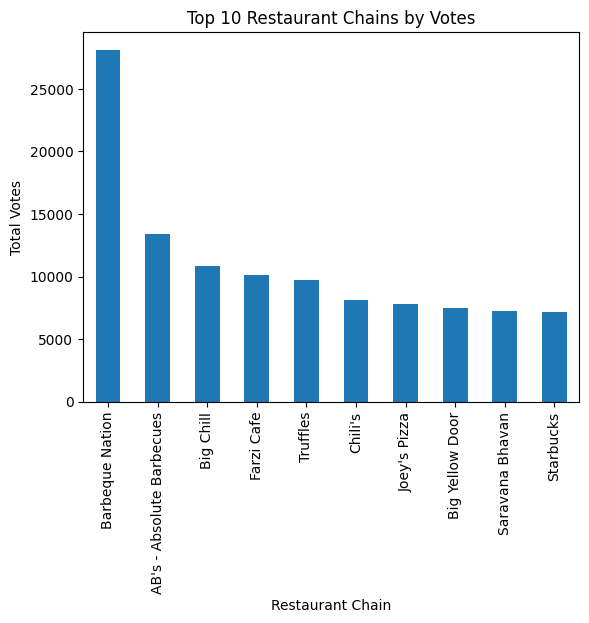

In [ ]:
chain_votes.head(10).plot(kind='bar')
plt.title('Top 10 Restaurant Chains by Votes')
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')
plt.show()


Restaurant chains were identified by analyzing restaurant names with multiple occurrences in the dataset. The popularity of chains was evaluated using total customer votes, while average ratings were used to assess performance. This analysis helps understand which chains are both popular and well-rated.